<a href="https://colab.research.google.com/github/Bhuvi237/Task-3-Housing-dataset/blob/main/Housing_dataset_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [153]:
dataset=pd.read_csv('/content/Housing.csv')

In [154]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [155]:
dataset.shape


(545, 13)

In [156]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [157]:
dataset.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [158]:
dataset.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [162]:
x = dataset.drop(['mainroad'], axis=1)


In [163]:
bool_cols = x.select_dtypes(include='bool').columns
x[bool_cols] = x[bool_cols].astype(int)


In [164]:
x_encoded = pd.get_dummies(x, drop_first=True)


In [165]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded)

In [166]:
x=dataset.drop(['price'],axis=1)
y=dataset['price']

In [167]:
print(x)

     area  bedrooms  bathrooms  ...  parking prefarea furnishingstatus
0    7420         4          2  ...        2      yes        furnished
1    8960         4          4  ...        3       no        furnished
2    9960         3          2  ...        2      yes   semi-furnished
3    7500         4          2  ...        3      yes        furnished
4    7420         4          1  ...        2       no        furnished
..    ...       ...        ...  ...      ...      ...              ...
540  3000         2          1  ...        2       no      unfurnished
541  2400         3          1  ...        0       no   semi-furnished
542  3620         2          1  ...        0       no      unfurnished
543  2910         3          1  ...        0       no        furnished
544  3850         3          1  ...        0       no      unfurnished

[545 rows x 12 columns]


In [168]:
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(545, 12) (436, 12) (109, 12)


In [170]:
model = LinearRegression()

In [171]:
x_test[bool_cols] = x_test[bool_cols].astype(int)


In [172]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

# Align columns in case test set has different categories
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)


In [173]:
print("NaNs in y_test:", np.isnan(y_test).sum())



NaNs in y_test: 0


In [174]:
# Check x_test for NaNs
print(x_test.isnull().sum())

# Option 1: Drop rows with NaNs
x_test = x_test.dropna()
y_test = y_test.loc[x_test.index]

# Option 2: Fill missing values
x_test = x_test.fillna(0)


area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_no                        0
mainroad_yes                       0
guestroom_no                       0
guestroom_yes                      0
basement_no                        0
basement_yes                       0
hotwaterheating_no                 0
hotwaterheating_yes                0
airconditioning_no                 0
airconditioning_yes                0
prefarea_no                        0
prefarea_yes                       0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


In [175]:
model.fit(x_train, y_train)



LinearRegression()

In [176]:
y_pred = model.predict(x_test)

In [177]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [178]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1313683610862.5579
R^2 Score: 0.6298518608872237


In [179]:
print(y.unique())
print(y.value_counts())


[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  4900000  4893

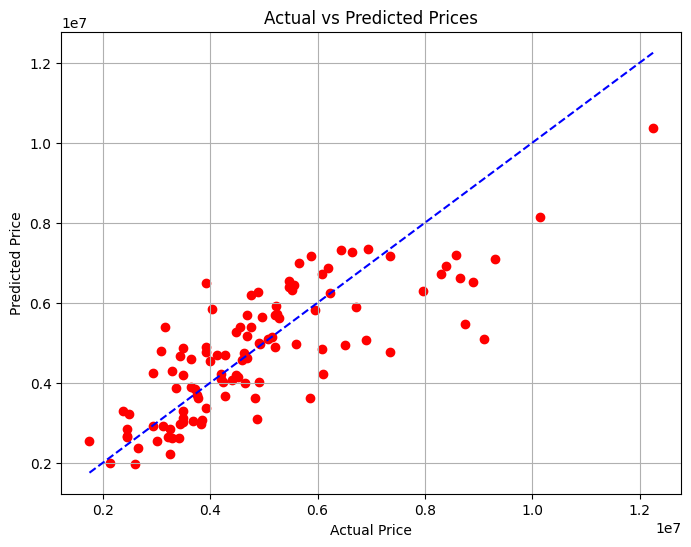

In [180]:


# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')  # ideal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()
